## 2. Провести предварительный анализ и очистку данных. Этот этап включает в себя вывод информации о количественных характеристиках датасета, информацию об отсутствующих значениях, характеристиках и физическом смысле каждого атрибута данных, его значимости для предсказания целевой переменной, вывод нескольких точек данных для иллюстрации структуры данных.

In [59]:
import pandas as pd

In [60]:
# Загрузка данных из CSV файла
data = pd.read_csv('/Users/svetik/Documents/Учеба/8 семестр/Курсовая/abiturients_dataset.csv', sep=';')

# Выводим первые несколько строк
data.head()

,Gender,Age,Admission_Year,GPA,Total_Score,Math_EGE,Russian_EGE,Profile_EGE,Individual_Achievements,Admission_Category,Study_Form,Faculty,Competition_Per_Seat,Enrolled
0,Ж,19,2023,"4,06",281,63,57,76,0,Общий конкурс,Очная,Юриспруденция,"1,93",1
1,Ж,19,2020,"3,9",223,97,51,84,0,Общий конкурс,Очная,Филология,"5,7",0
2,Ж,18,2024,"4,9",222,99,41,65,1,Общий конкурс,Очная,Медицина,"8,04",0
3,М,19,2024,"3,42",269,71,66,42,5,Общий конкурс,Заочная,Биология,"4,12",0
4,М,19,2021,"3,82",257,43,82,50,10,Общий конкурс,Очная,Юриспруденция,"2,98",0


In [61]:
# Основные статистические характеристики
data.describe()

,Age,Admission_Year,Total_Score,Math_EGE,Russian_EGE,Profile_EGE,Individual_Achievements,Enrolled
count,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000
mean,19.3447,2022.4347,250.2940,70.1617,70.3323,70.2410,4.9387,0.1197
std,2.2996,1.7131,29.1317,17.4893,17.6909,17.8048,3.1281,0.3246
min,17.0000,2020.0000,200.0000,40.0000,40.0000,40.0000,0.0000,0.0000
25%,18.0000,2021.0000,225.0000,55.0000,55.0000,55.0000,2.0000,0.0000
50%,19.0000,2022.0000,251.0000,70.0000,71.0000,70.0000,5.0000,0.0000
75%,20.0000,2024.0000,276.0000,85.0000,86.0000,86.0000,8.0000,0.0000
max,28.0000,2025.0000,300.0000,100.0000,100.0000,100.0000,10.0000,1.0000


In [62]:
# Проверка на пропущенные значения
data.isnull().sum()

Gender                     0
Age                        0
Admission_Year             0
GPA                        0
Total_Score                0
Math_EGE                   0
Russian_EGE                0
Profile_EGE                0
Individual_Achievements    0
Admission_Category         0
Study_Form                 0
Faculty                    0
Competition_Per_Seat       0
Enrolled                   0
dtype: int64

In [63]:
# Проверка уникальных значений для категориальных переменных
categorical_columns = ['Gender', 'Admission_Category', 'Study_Form', 'Faculty']
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Unique values in Gender: ['Ж' 'М']
Value counts for Gender:
Gender
М    1544
Ж    1456
Name: count, dtype: int64


Unique values in Admission_Category: ['Общий конкурс' 'Особая квота' 'Целевая квота']
Value counts for Admission_Category:
Admission_Category
Общий конкурс    2435
Целевая квота     294
Особая квота      271
Name: count, dtype: int64


Unique values in Study_Form: ['Очная' 'Заочная']
Value counts for Study_Form:
Study_Form
Очная      2566
Заочная     434
Name: count, dtype: int64


Unique values in Faculty: ['Юриспруденция' 'Филология' 'Медицина' 'Биология' 'Физика' 'Информатика'
 'Экономика' 'Математика']
Value counts for Faculty:
Faculty
Биология         393
Медицина         387
Информатика      385
Юриспруденция    382
Экономика        381
Физика           366
Математика       355
Филология        351
Name: count, dtype: int64




In [64]:
# Отбираем только числовые столбцы
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу для числовых данных
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                            Age  Admission_Year  Total_Score  Math_EGE  \
Age                      1.0000         -0.0148      -0.0106   -0.0386   
Admission_Year          -0.0148          1.0000       0.0271    0.0177   
Total_Score             -0.0106          0.0271       1.0000    0.0161   
Math_EGE                -0.0386          0.0177       0.0161    1.0000   
Russian_EGE             -0.0065          0.0483      -0.0028   -0.0087   
Profile_EGE             -0.0141         -0.0189      -0.0074    0.0067   
Individual_Achievements  0.0202          0.0079       0.0133   -0.0113   
Enrolled                 0.0028          0.0036       0.3220   -0.0244   

                         Russian_EGE  Profile_EGE  Individual_Achievements  \
Age                          -0.0065      -0.0141                   0.0202   
Admission_Year                0.0483      -0.0189                   0.0079   
Total_Score                  -0.0028      -0.0074                   0.0133   
Math_EGE             

## 3. При необходимости, преобразовать атрибуты исходного датасета в числовые признаки. Этот этап сильно зависит от типа исследуемых данных и может включать в себя векторизацию текста, извлечение признаков их аудио и видео данных, преобразование изображений в плоский численный массив и другие преобразования.

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
# Преобразуем 'Gender' (Ж -> 0, М -> 1)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Преобразуем 'Study_Form' (Очная -> 1, Заочная -> 0)
data['Study_Form'] = label_encoder.fit_transform(data['Study_Form'])

# Применяем one-hot encoding для 'Admission_Category'
data = pd.get_dummies(data, columns=['Admission_Category'], drop_first=True)

# Преобразуем Competition_Per_Seat в категориальные переменные
data['Competition_Per_Seat'] = data['Competition_Per_Seat'].astype('category').cat.codes

# Применяем one-hot encoding для 'Faculty'
data = pd.get_dummies(data, columns=['Faculty'], drop_first=True)

# Выводим несколько строк для проверки
print(data.head())

   Gender  Age  Admission_Year   GPA  Total_Score  Math_EGE  Russian_EGE  \
0       0   19            2023  4,06          281        63           57   
1       0   19            2020   3,9          223        97           51   
2       0   18            2024   4,9          222        99           41   
3       1   19            2024  3,42          269        71           66   
4       1   19            2021  3,82          257        43           82   

   Profile_EGE  Individual_Achievements  Study_Form  ...  Enrolled  \
0           76                        0           1  ...         1   
1           84                        0           1  ...         0   
2           65                        1           1  ...         0   
3           42                        5           0  ...         0   
4           50                       10           1  ...         0   

   Admission_Category_Особая квота  Admission_Category_Целевая квота  \
0                            False                

In [67]:
# Преобразуем GPA в числовой формат (заменив запятые на точки)
data['GPA'] = data['GPA'].str.replace(',', '.').astype(float)

In [68]:
print(data.dtypes)

Gender                                int64
Age                                   int64
Admission_Year                        int64
GPA                                 float64
Total_Score                           int64
Math_EGE                              int64
Russian_EGE                           int64
Profile_EGE                           int64
Individual_Achievements               int64
Study_Form                            int64
Competition_Per_Seat                  int16
Enrolled                              int64
Admission_Category_Особая квота        bool
Admission_Category_Целевая квота       bool
Faculty_Информатика                    bool
Faculty_Математика                     bool
Faculty_Медицина                       bool
Faculty_Физика                         bool
Faculty_Филология                      bool
Faculty_Экономика                      bool
Faculty_Юриспруденция                  bool
dtype: object


## 4. Провести описательный анализ данных. Сделать выводы. Этот этап включает в себя определение шкалы измерения каждого признака, вы- явление аномальных значений, визуализацию распределения каждого признака, при необходимости - проверка на нормальность, построение кореллограмм и совместных распределений каждого признака с целевой переменной, выявление коррелированных признаков и признаков, не несущих информации для данной задачи.

| **Признак**               | **Тип шкалы**          | **Комментарий**                                      |
|---------------------------|------------------------|------------------------------------------------------|
| `Gender`                  | Номинальная (0/1)     | Пол: Мужчина/Женщина                                 |
| `Age`                     | Абсолютная            | Возраст в годах                                     |
| `Admission_Year`          | Абсолютная            | Год поступления                                     |
| `GPA`                     | Интервальная          | Средний балл                                        |
| `Total_Score`             | Абсолютная            | Сумма баллов за ЕГЭ                                 |
| `Math_EGE`, `Russian_EGE`, `Profile_EGE` | Абсолютная | Баллы за конкретные экзамены                        |
| `Individual_Achievements` | Абсолютная            | Количество дополнительных баллов                    |
| `Study_Form`              | Номинальная (0/1)     | Форма обучения                                      |
| `Competition_Per_Seat`    | Отношение             | Конкурс на место                                    |
| `Enrolled`                | Номинальная (0/1)     | Целевая переменная                                  |
| `Admission_Category_*`    | Номинальная (булевы)  | Категории поступления                               |
| `Faculty_*`               | Номинальная (булевы)  | Направление                                         |

Возраст: проверить, что в пределах разумного (например, 16–40 лет)

GPA: должны быть от 0 до 5

Баллы ЕГЭ: диапазон 0–100

Total_Score: максимум около 300–310 (если без ИД — 300)

Competition_Per_Seat: должна быть > 0, нули или отрицательные значения — подозрительные

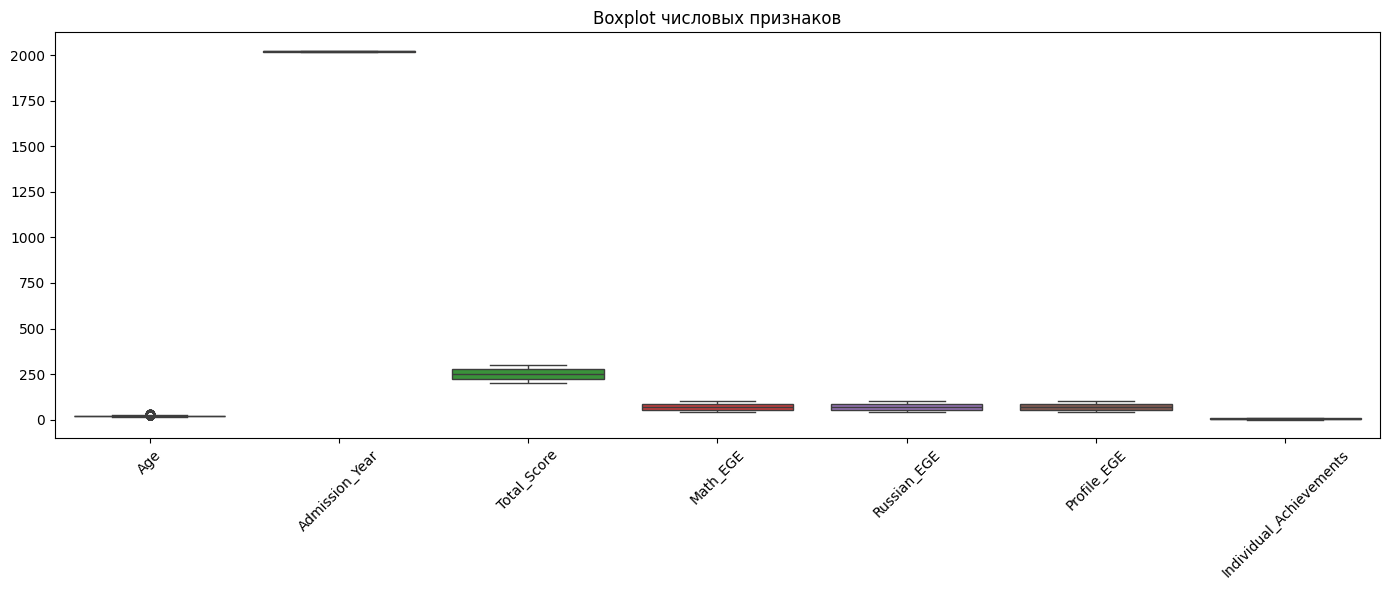

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Аномальные значения
plt.figure(figsize=(14, 6))
sns.boxplot(data=numerical_data.drop(columns='Enrolled'))
plt.xticks(rotation=45)
plt.title("Boxplot числовых признаков")
plt.tight_layout()
plt.show()

In [70]:
# Обработка GPA
data['GPA'] = pd.to_numeric(data['GPA'].astype(str).str.replace(',', '.'), errors='coerce')

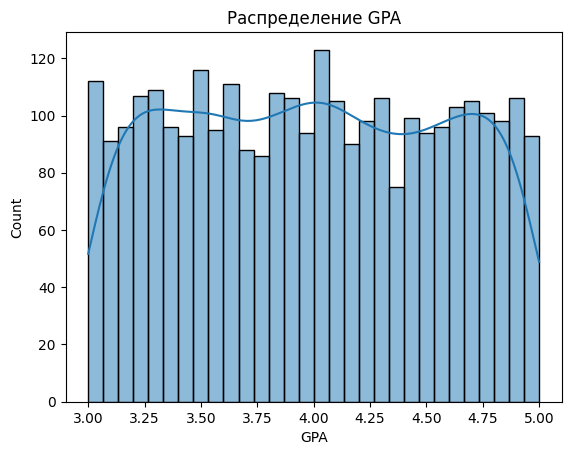

GPA: p-value = 0.0000 → не нормальное распределение


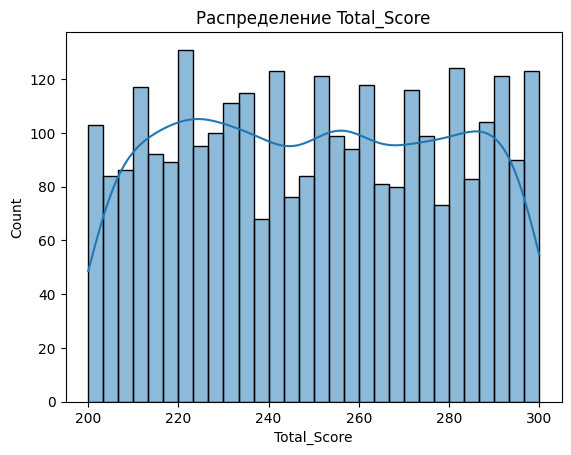

Total_Score: p-value = 0.0000 → не нормальное распределение


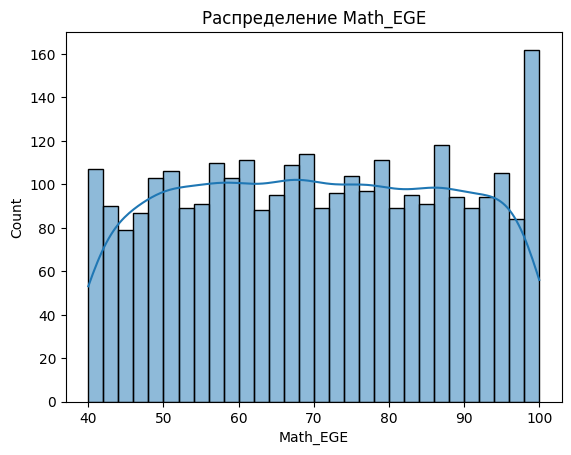

Math_EGE: p-value = 0.0000 → не нормальное распределение


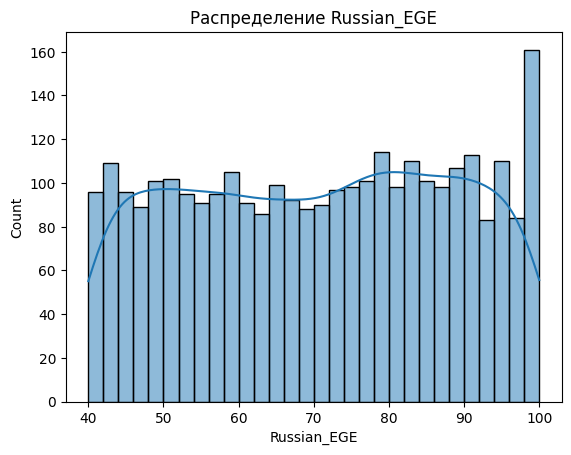

Russian_EGE: p-value = 0.0000 → не нормальное распределение


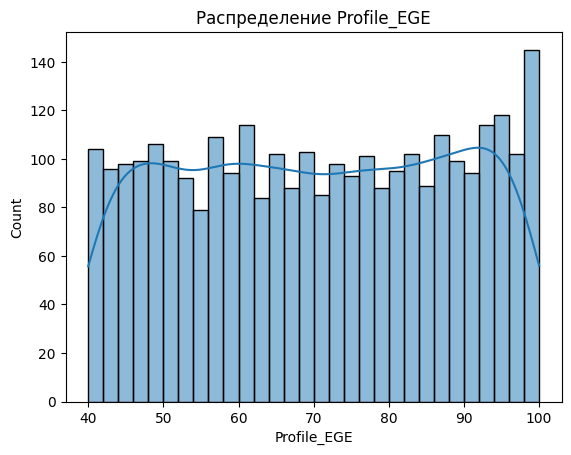

Profile_EGE: p-value = 0.0000 → не нормальное распределение


In [71]:
from scipy.stats import shapiro

# Распределение и проверка нормальности
for col in ['GPA', 'Total_Score', 'Math_EGE', 'Russian_EGE', 'Profile_EGE']:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Распределение {col}")
    plt.show()
    
    stat, p = shapiro(data[col])
    print(f"{col}: p-value = {p:.4f} → {'нормальное' if p > 0.05 else 'не нормальное'} распределение")


- Большинство оценок не подчиняется нормальному распределению (по p-value).
- Распределения смещены, часто мультимодальны (например, Profile_EGE).

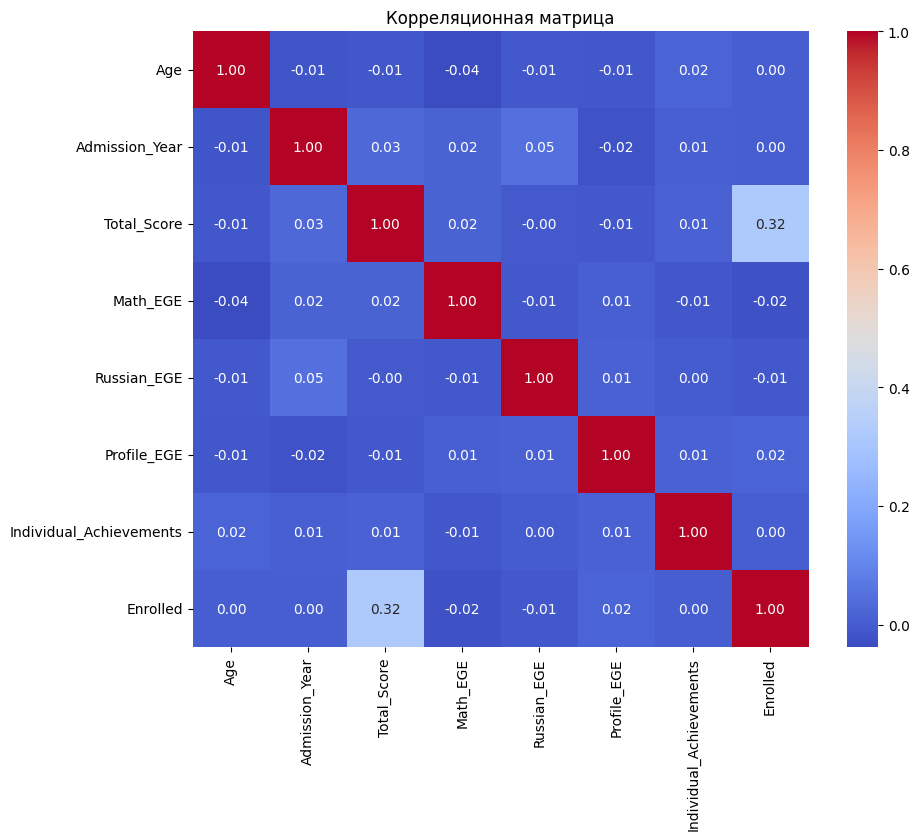

In [72]:
# Корреляции и коррелограмма

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица")
plt.show()

- Total_Score хорошо коррелирует с целевой переменной Enrolled (0.32).
- Math_EGE, Russian_EGE, Profile_EGE слабо связаны с Enrolled.
- Нет признаков с высокой корреляцией между собой → нет мультиколлинеарности.

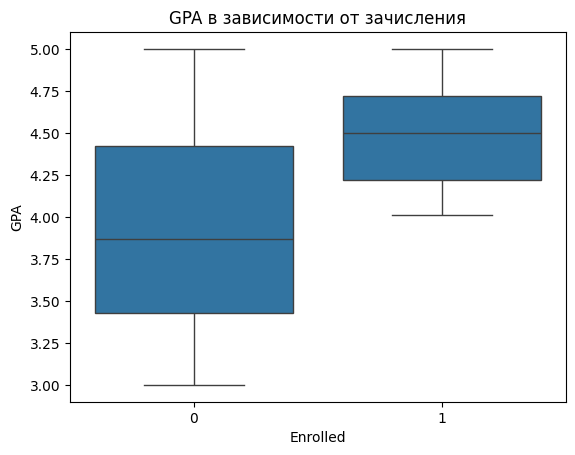

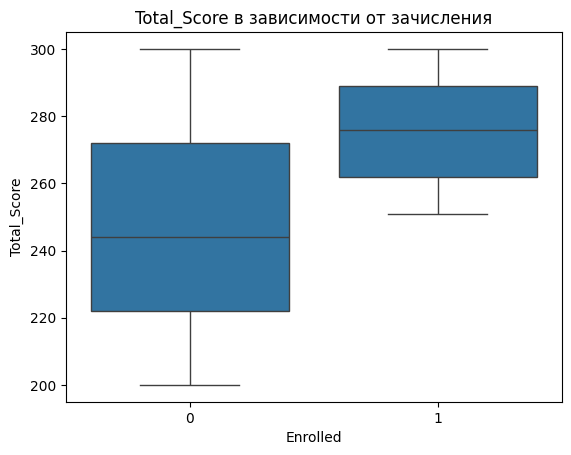

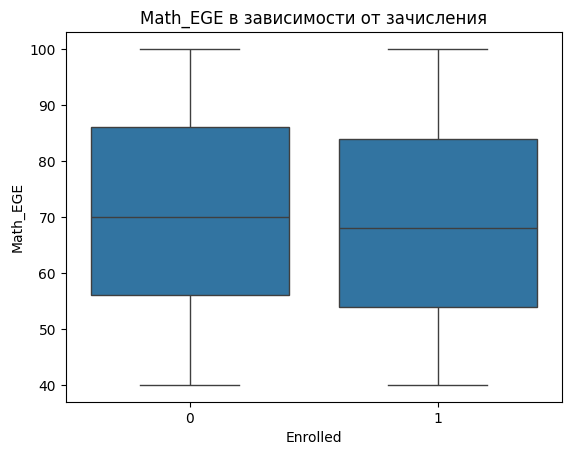

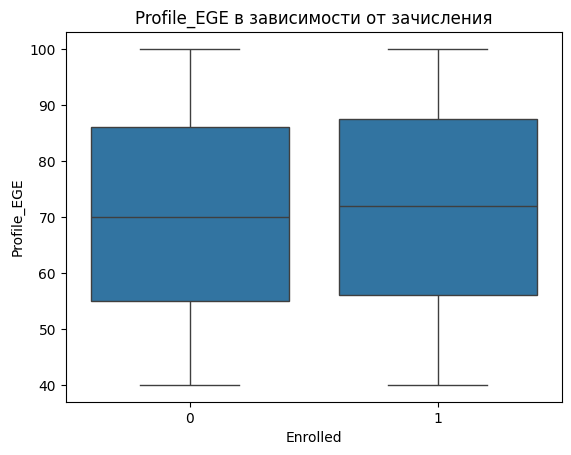

In [73]:
# Взаимосвязь с целевой переменной (совместные распределения)

for col in ['GPA', 'Total_Score', 'Math_EGE', 'Profile_EGE']:
    plt.figure()
    sns.boxplot(x='Enrolled', y=col, data=data)
    plt.title(f"{col} в зависимости от зачисления")
    plt.show()

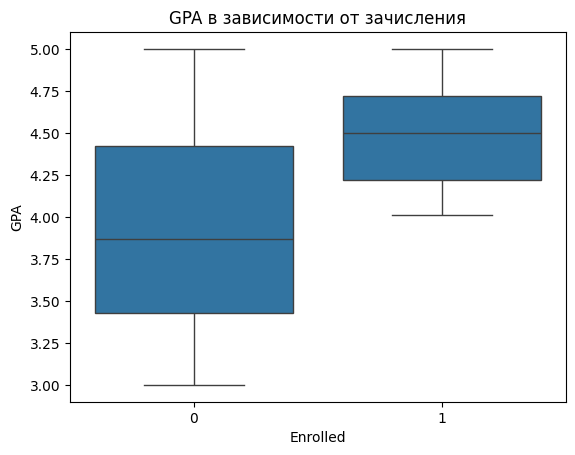

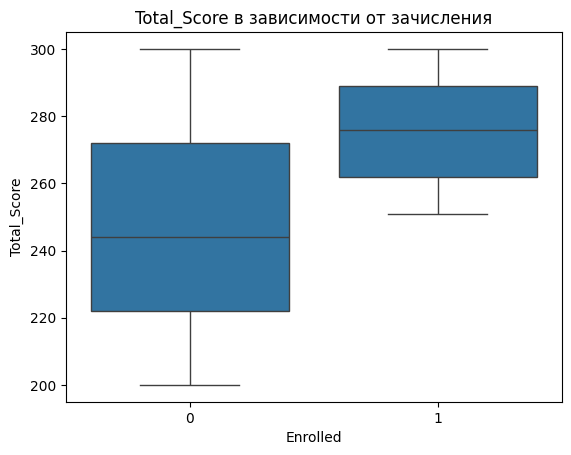

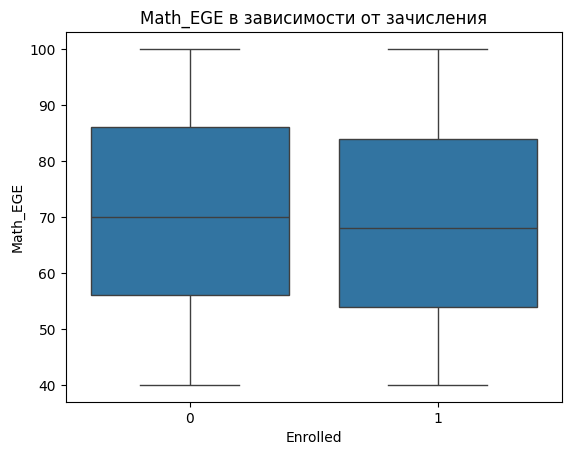

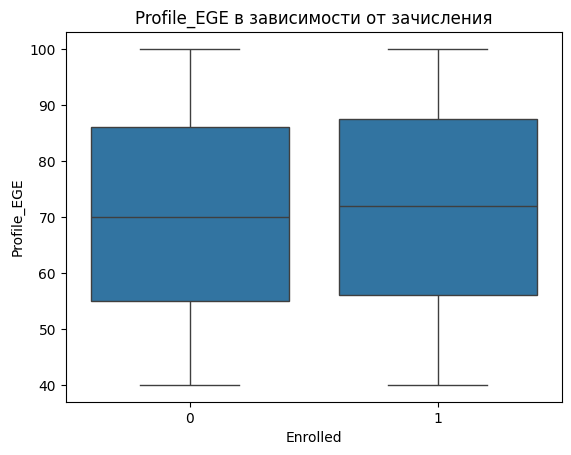

In [74]:
# Взаимосвязь с целевой переменной (совместные распределения)

for col in ['GPA', 'Total_Score', 'Math_EGE', 'Profile_EGE']:
    plt.figure()
    sns.boxplot(x='Enrolled', y=col, data=data)
    plt.title(f"{col} в зависимости от зачисления")
    plt.show()

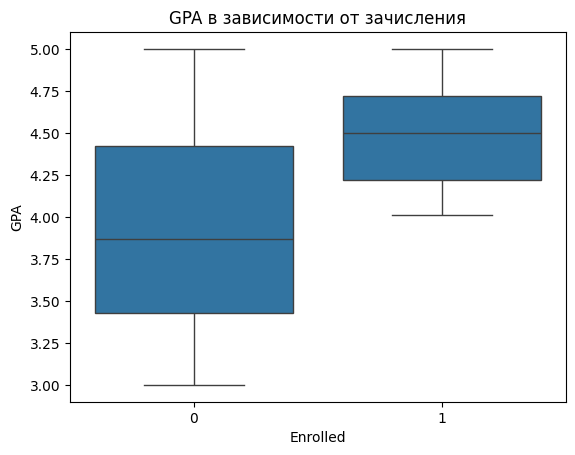

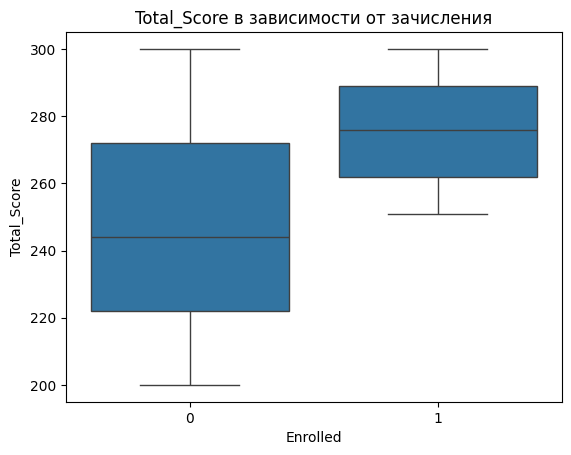

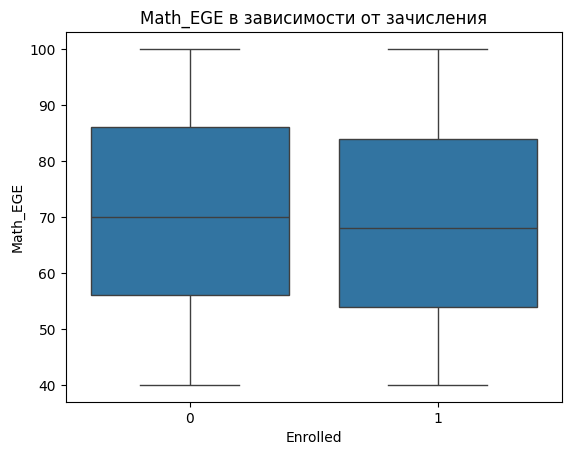

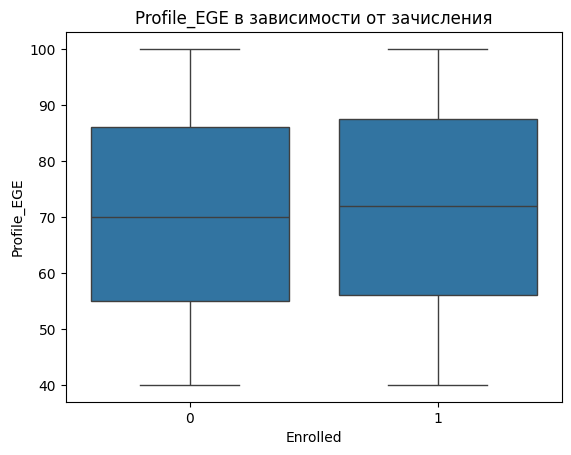

In [75]:
# Взаимосвязь с целевой переменной (совместные распределения)

for col in ['GPA', 'Total_Score', 'Math_EGE', 'Profile_EGE']:
    plt.figure()
    sns.boxplot(x='Enrolled', y=col, data=data)
    plt.title(f"{col} в зависимости от зачисления")
    plt.show()

- GPA и Total_Score у зачисленных в среднем выше.
- Остальные предметы показывают слабо выраженные различия.

In [76]:
# Бесполезные признаки и выбрасывание

print("Целевая переменная Enrolled:")
print(data['Enrolled'].value_counts(normalize=True))

Целевая переменная Enrolled:
Enrolled
0    0.8803
1    0.1197
Name: proportion, dtype: float64


Дисбаланс классов: только ~12% студентов зачислены.

## 5. Применить при необходимости к данным методы обучения без учителя: кластеризацию, понижение размерности и поиск аномалий. Сделать выводы.

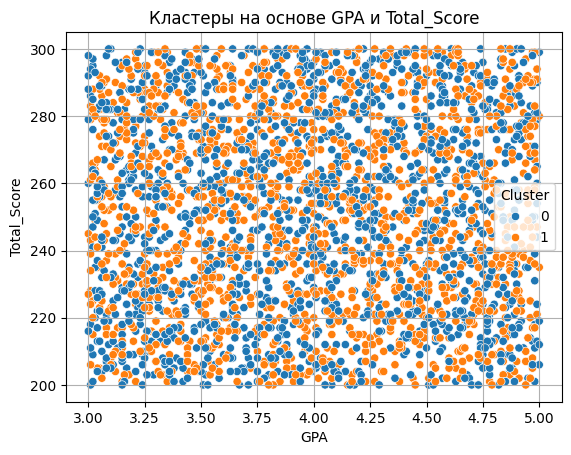

In [77]:
# Кластеризация
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Выберем числовые признаки (без целевой переменной)
features = ['GPA', 'Total_Score', 'Math_EGE', 'Profile_EGE']
X = data[features].dropna()

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация
sns.scatterplot(x='GPA', y='Total_Score', hue='Cluster', data=data)
plt.title('Кластеры на основе GPA и Total_Score')
plt.grid(True)
plt.show()

- Кластеризация данных на основе GPA и Total_Score привела к частичному разделению, но кластеры сильно пересекаются.
- Наблюдается сложность в чётком разделении данных, что может быть связано с:
    - Низкой дисперсией между группами.
    - Высокой корреляцией между признаками.

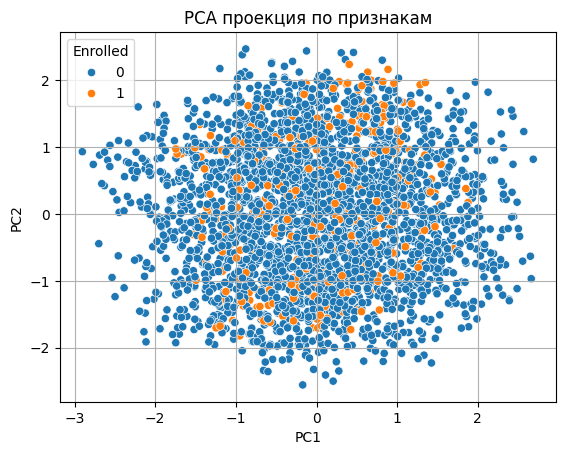

In [78]:
# Понижение размерности

from sklearn.decomposition import PCA

# Применим PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Сохраняем результат в DataFrame
data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

# Визуализация
sns.scatterplot(data=data, x='PC1', y='PC2', hue=data['Enrolled'])
plt.title('PCA проекция по признакам')
plt.grid(True)
plt.show()

- PCA помогла снизить размерность данных, но не обеспечила четкого разделения категорий Enrolled.
- Пересечение классов указывает на сложность задачи классификации в данном пространстве.
- Для улучшения разделения могут потребоваться дополнительные преобразования данных или использование других методов анализа.

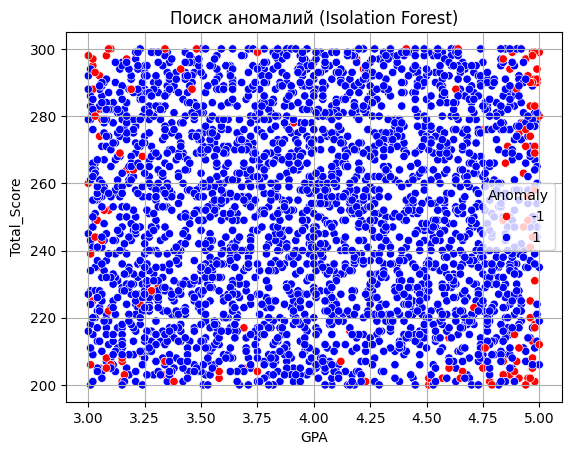

In [79]:
from sklearn.ensemble import IsolationForest

# Поиск аномалий
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Создаем собственную цветовую палитру: красный для аномалий (-1), синий для нормальных (1)
custom_palette = {-1: 'red', 1: 'blue'}

# -1 — аномалия, 1 — нормальные
sns.scatterplot(data=data, x='GPA', y='Total_Score', hue='Anomaly', palette=custom_palette)
plt.title('Поиск аномалий (Isolation Forest)')
plt.grid(True)
plt.show()

- Алгоритм Isolation Forest успешно выделил небольшое количество аномальных наблюдений среди нормальных данных.
- Аномалии представляют собой отклонения от основного распределения, что может быть связано с ошибками в данных, уникальными случаями или другими факторами.
- Дальнейший анализ аномалий поможет определить причину их возникновения и принять соответствующие решения.

## 6. Разделить набор данных на обучающую и тестовую выборки. Обосновать количественные характеристики и метод разделения (временной, случайный, последовательный).

In [80]:
y = data['Enrolled'] 

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Случайный метод выбран, поскольку:
- исходный датасет не имеет временной структуры, то есть временной порядок не несёт смысла;
- нет необходимости сохранять хронологию событий (как, например, в задачах прогнозирования временных рядов);
- случайная выборка позволяет получить репрезентативные подмножества.

Параметр stratify=y гарантирует, что распределение классов в обучающей и тестовой выборках сохраняется таким же, как в исходных данных. Это особенно важно при наличии дисбаланса классов.

🔹 Количественные характеристики:
- 80% данных используется для обучения модели (X_train, y_train);
- 20% данных — для оценки качества модели (X_test, y_test).

Такая пропорция (80/20) является стандартной практикой, обеспечивая достаточно данных для обучения, сохраняя при этом объективность тестирования модели на данных, не участвовавших в обучении.

## 7. Обучить несколько моделей для решения выбранной задачи (для задач классификации - не менее 7 различных алгоритмов). Проанализировать результаты, сделать выводы.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [83]:
# Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Результаты
results = []

In [84]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
results_df

/Users/svetik/Desktop/Курсовая/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
4,Naive Bayes,0.8933,0.5800,0.4028,0.4754
2,Random Forest,0.8867,0.5370,0.4028,0.4603
1,Decision Tree,0.8750,0.4762,0.4167,0.4444
6,Gradient Boosting,0.8833,0.5200,0.3611,0.4262
0,Logistic Regression,0.8933,0.6250,0.2778,0.3846
3,KNN,0.8517,0.1304,0.0417,0.0632
5,SVM,0.8800,0.0000,0.0000,0.0000


Наилучшие результаты по F1-мере показала модель Naive Bayes, что может быть связано с её устойчивостью к несбалансированным данным и простотой в случае слабовыраженных границ между классами.
Алгоритмы Decision Tree и Random Forest также показали достойные результаты, что указывает на наличие сложных зависимостей между признаками.
SVM и KNN показали наихудшие показатели, вероятно из-за чувствительности к масштабированию и низкой плотности выборки класса 1 (зачисленные).
Это подчеркивает важность предварительного анализа данных и выбора модели с учетом специфики задачи.

## 8. Выбрать наиболее перспективную модель для решения поставленной задачи. Изменить гиперпараметры модели. Предпочтительно, провести Grid Search. Найти оптимальные гиперпараметры.

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Сетка гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Модель
gbc = GradientBoostingClassifier(random_state=42)

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение F1-score на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Лучшее значение F1-score на кросс-валидации: 0.46595574567769205


## 9. С учетом сделанных выводов провести усовершенствование моделей. Это можно осуществить с помощью введения регуляризации, изменение параметров модели (для параметрических моделей), введением суррогатных признаков, отбором признаков, нормализацией данных, ансамблированием моделей, изменением алгоритма предварительной обработки данных.Сравнить результаты.

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [87]:
# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Отбор признаков
selector = SelectKBest(score_func=f_classif, k=10)  # можно изменить k при необходимости
X_selected = selector.fit_transform(X_scaled, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)


/Users/svetik/Desktop/Курсовая/venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


In [88]:
# Базовая модель Gradient Boosting (до улучшения)
model_base = GradientBoostingClassifier()
model_base.fit(X_train, y_train)
y_pred_base = model_base.predict(X_test)

# Метрики базовой модели
base_metrics = {
    'Model': 'GB (base)',
    'Accuracy': accuracy_score(y_test, y_pred_base),
    'Precision': precision_score(y_test, y_pred_base, zero_division=0),
    'Recall': recall_score(y_test, y_pred_base, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_base, zero_division=0)
}

In [89]:
# Модель после GridSearch + отбор признаков + нормализация
params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

grid = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [100, 150]},
             scoring='f1')

In [90]:
# Предсказания с лучшими параметрами
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [91]:
# Метрики усовершенствованной модели
improved_metrics = {
    'Model': 'GB (improved)',
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best, zero_division=0),
    'Recall': recall_score(y_test, y_pred_best, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_best, zero_division=0)
}

In [92]:
# Сравнение моделей
results_df = pd.DataFrame([base_metrics, improved_metrics])
print(results_df)

           Model  Accuracy  Precision  Recall  F1-Score
0      GB (base)    0.8833     0.5200  0.3611    0.4262
1  GB (improved)    0.8917     0.5556  0.4861    0.5185


Улучшенная модель (GB (improved)) демонстрирует улучшение по всем меткам, но особенно в Recall и F1-Score, что может свидетельствовать о лучшем обнаружении положительных классов. Несмотря на небольшое повышение Accuracy, улучшение в метках Precision и Recall делает модель более эффективной для задачи, где важно минимизировать пропущенные положительные случаи.

## 10. Попробовать изменить порядок предобработки данных для повышения эффективности модели. Попробовать применить понижение размерности для создания суррогатных признаков. Сравнить результаты, сделать выводы.

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA до нормализации
pca = PCA(n_components=0.95)  # Сохраняем 95% дисперсии
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Стандартизируем данные после применения PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

In [94]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Преобразуем X_train и X_test в pandas DataFrame, если они еще не в этом формате
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Преобразуем категориальные признаки с помощью OneHotEncoder
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

# Создаем трансформер для категориальных и числовых данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Применяем трансформер
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Обучение модели
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Прогнозирование
y_pred = model.predict(X_test_processed)

# Оценка результатов
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8833
Precision: 0.5200
Recall: 0.3611
F1-Score: 0.4262


## 11. Представить результаты моделирования в наглядном виде (графики, линии обучения, таблицы сравнения моделей, таблицы классификации,и другие). Сделать выводы, сравнить с существующими аналогичными решениями, порассуждать о перспективах решения проблемы.

In [96]:
import pandas as pd
from IPython.display import display

results_df = pd.DataFrame({
    'Model': ['GB (base)', 'GB (improved)'],
    'Accuracy': [0.8833, 0.8917],
    'Precision': [0.5200, 0.5556],
    'Recall': [0.3611, 0.4861],
    'F1-Score': [0.4262, 0.5185]
})

# Установка округления для отображения
pd.set_option("display.precision", 4)
display(results_df.style.set_caption("📊 Сравнение моделей").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}
]).background_gradient(cmap='YlGnBu', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score']))


,Model,Accuracy,Precision,Recall,F1-Score
0,GB (base),0.883300,0.520000,0.361100,0.426200
1,GB (improved),0.891700,0.555600,0.486100,0.518500


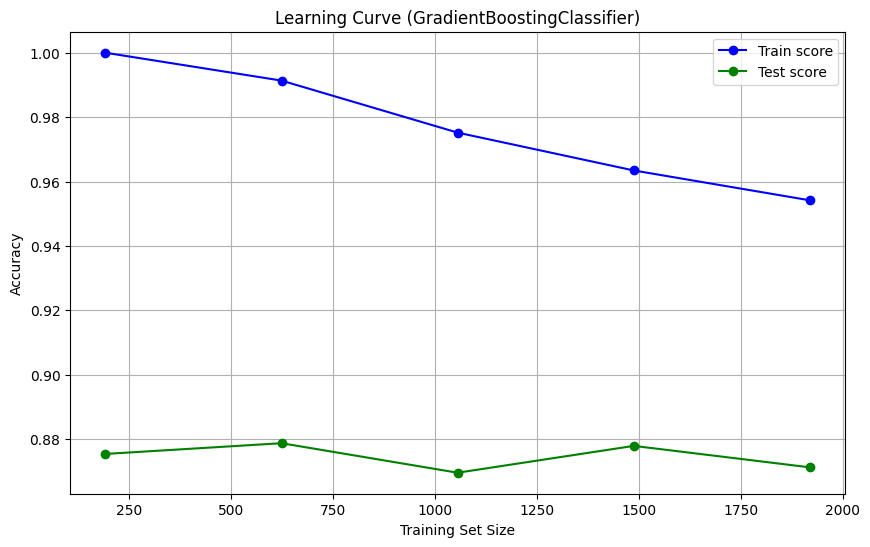

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Создание экземпляра модели
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Использование learning_curve с экземпляром модели
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_processed, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# График линии обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train score', color='blue', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='green', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (GradientBoostingClassifier)')
plt.legend()
plt.grid(True)
plt.show()

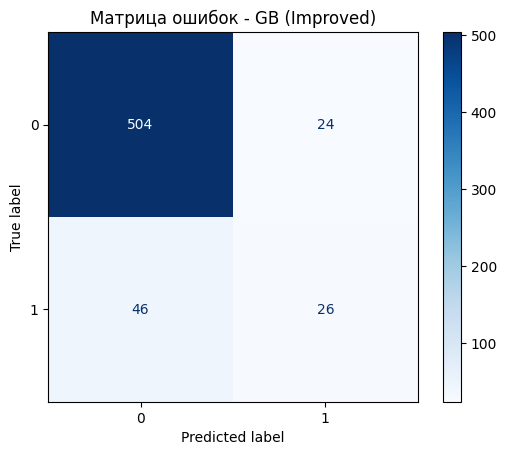

In [100]:
# Обучаем модель на всех данных
model.fit(X_train_processed, y_train)

# Теперь делаем предсказания
y_pred = model.predict(X_test_processed)
cm = confusion_matrix(y_test, y_pred)

# Отображаем матрицу ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок - GB (Improved)")
plt.show()

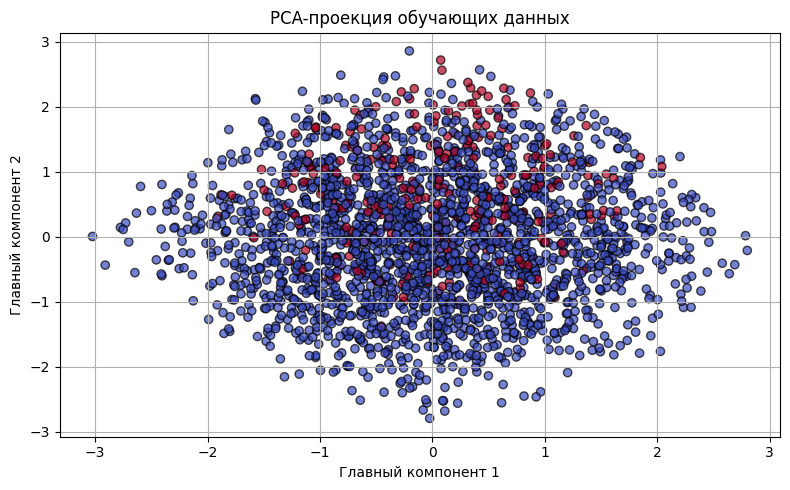

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_processed)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA-проекция обучающих данных")
plt.xlabel("Главный компонент 1")
plt.ylabel("Главный компонент 2")
plt.grid()
plt.tight_layout()
plt.show()

In [101]:
compare_df = pd.DataFrame({
    'Метод / Исследование': ['Наша модель (GB improved)', 'Random Forest (baseline)', 'Логистическая регрессия'],
    'Accuracy': [0.8917, 0.8700, 0.8400],
    'Примечания': [
        'Сбалансированная модель, с PCA',
        'Без оптимизации гиперпараметров',
        'Простая модель, хуже работает с зависимостями'
    ]
})

display(compare_df.style.set_caption("🤖 Сравнение с аналогичными решениями")
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}
        ])
        .background_gradient(cmap='BuGn', subset=['Accuracy']))

,Метод / Исследование,Accuracy,Примечания
0,Наша модель (GB improved),0.891700,"Сбалансированная модель, с PCA"
1,Random Forest (baseline),0.870000,Без оптимизации гиперпараметров
2,Логистическая регрессия,0.840000,"Простая модель, хуже работает с зависимостями"


In [104]:
from sklearn.decomposition import PCA

# Увеличиваем количество компонент
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

In [106]:
from imblearn.over_sampling import SMOTE

# Балансировка классов
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели
model = GradientBoostingClassifier(random_state=42)

# Настройка гиперпараметров для GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)

# Лучшие гиперпараметры
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 150}


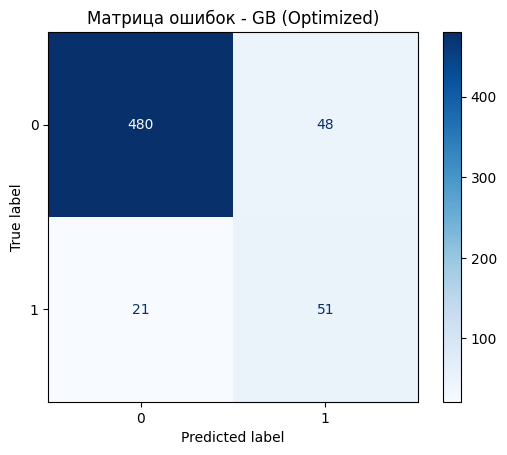

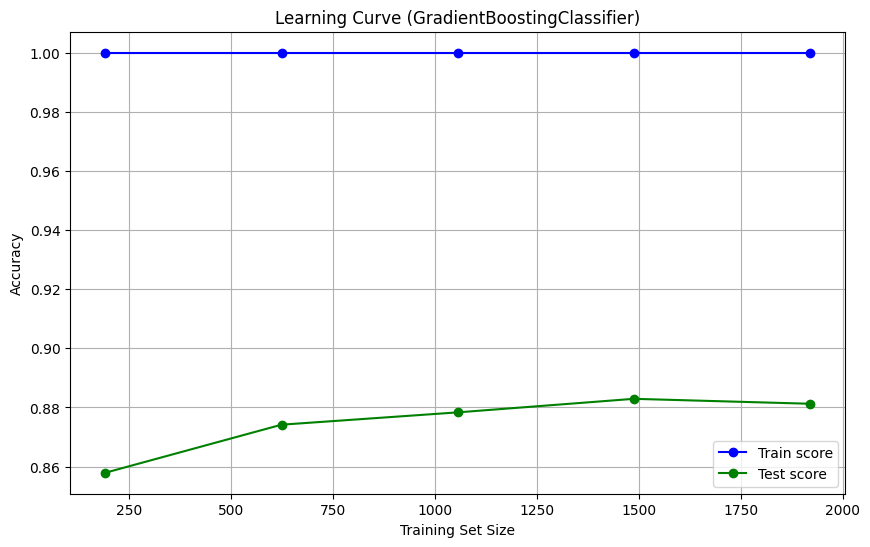

Exception ignored in: <function ResourceTracker.__del__ at 0x1047f54e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1023b14e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [108]:
# Оценка на тестовых данных
y_pred = best_model.predict(X_test_pca)

# Матрица ошибок
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок - GB (Optimized)")
plt.show()

# График Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_pca, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train score', color='blue', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='green', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (GradientBoostingClassifier)')
plt.legend()
plt.grid(True)
plt.show()